2.1

In [1]:
function potential_sphere = potential_sphere(R,r,rho)
   for i = 1:length(r)
        if r(i) < R% length < radius
            potential_sphere(i)= 2*pi*(6.67428*10^-11)*rho*(R^2 -(1/3)*r(i)^2);
        else % length > radius
            potential_sphere(i) = ((6.67428*10^-11)*(4/3)*pi*(R.^3)*rho)/r(i);
        end
    end
end

In [2]:
function attraction_sphere = attraction_sphere(R,r,rho)
    for i = 1:length(r)
        if r(i) < R % length < radius
            attraction_sphere(i) = (-4/3)*pi*(6.67428*10^-11)*rho*r(i);
        else % length > radius
            attraction_sphere(i) = ((6.67428*10^-11)*(4/3)*pi*(R.^3)*rho)/r(i);
        end
    end
end

In [3]:
function attraction_sphericalshell = attraction_sphericalshell(R1,R2,r,rho)
    for i = 1:length(r)
        if r(i) < R1 % length < innerradius
            attraction_sphericalshell(i) = 0;
        elseif r(i) < R2 && r(i) >= R1   % outerradius> length > innerradius
            attraction_sphericalshell(i) =  (-4/3)*pi*(6.67428*10^-11)*rho*(r(i)^3 - R1^3)/(r(i)^2);
        else % length > outerradius
            attraction_sphericalshell(i) =  (-4/3)*pi*(6.67428*10^-11)*rho*(R2^3 - R1^3)/(r(i)^2);
        end
    end
end

In [4]:
function potential_sphericalshell = potential_sphericalshell(R1,R2,r,rho)
    for i = 1:length(r)
        if r(i) < R1 % length < innerradius
            potential_sphericalshell(i) = 2*pi*(6.67428*10^-11)*rho*(R2^2 - R1^2) ;
        elseif r(i) < R2 && r(i) >= R1 % outerradius> length > innerradius
            potential_sphericalshell(i) = 2*pi*(6.67428*10^-11)*rho*(R2^2 - (1/3)*(r(i)^2)) - (-4/3)*pi*(6.67428*10^-11)*rho*(R1^3)/r(i);
        else % length > outerradius
            potential_sphericalshell(i) =  (4/3)*pi*(6.67428*10^-11)*rho*(R2^3 - R1^3)/(r(i));
        end
    end
end

2.2

In [5]:
%Density  
rho_crust = 2700 ;  %of crust in kg/m^3
rho_mantle = 5500; %of mantle inkg/m^3
rho_core = 12000; %of core inkg/m^3

%radius 
R_crust = 6378*10^3;%metres
R_mantle = 6278*10^3;%metres
R_core = 3378*10^3 ;%metres



At any point V_total = V_crust + V_mantle + V_core                                            
 total distance from center of earth = 20000 + 6378 = 26378 km                              
 as taking steps of 10km size will not fit because the thota number of inputs of r will be 26378/10 + 1 = 2638.8 


In [6]:
r = [0:10000:26378000];

% finding potential at every r
V_core = potential_sphere(R_core,r,rho_core); %potential core
V_mantle = potential_sphericalshell(R_core,R_mantle,r,rho_mantle);%potential mantle
V_crust = potential_sphericalshell(R_mantle,R_crust,r,rho_crust);%potential crust
V_total = V_core+V_mantle+V_crust;% total potential

attraction_total = attraction_core + attraction_mantle + attraction_crust

In [7]:
attraction_core = attraction_sphere(R_core,r,rho_core);% attraction core
attraction_mantle = potential_sphericalshell(R_core,R_mantle,r,rho_mantle);% attraction mantle
attraction_crust = potential_sphericalshell(R_mantle,R_crust,r,rho_crust); % attraction crust
attraction_total = attraction_core + attraction_mantle + attraction_crust; % attraction total

 2.3

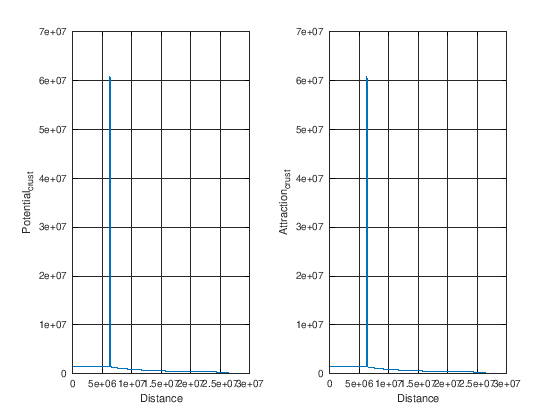

In [21]:
% crust
subplot(1,2,1);
plot(r,V_crust)
xlabel('Distance')
ylabel('Potential_{crust}')
grid
subplot(1,2,2);
plot(r,attraction_crust)
xlabel('Distance')
ylabel('Attraction_{crust}')
grid




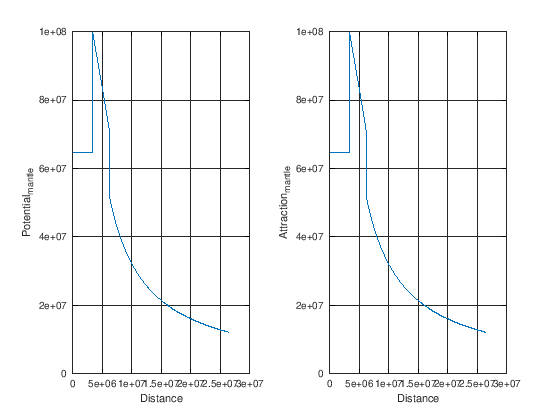

In [22]:
% mantle
subplot(1,2,1);
plot(r,V_mantle)
xlabel('Distance')
ylabel('Potential_{mantle}')
grid
subplot(1,2,2);
plot(r,attraction_mantle)
xlabel('Distance')
ylabel('Attraction_{mantle}')
grid



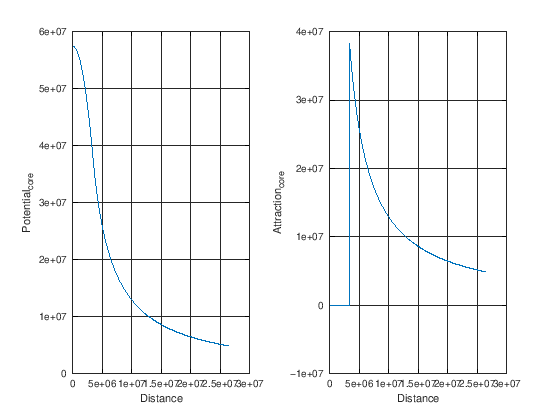

In [23]:
% core
subplot(1,2,1);
plot(r,V_core)
xlabel('Distance')
ylabel('Potential_{core}')
grid
subplot(1,2,2);
plot(r,attraction_core)
xlabel('Distance')
ylabel('Attraction_{core}')
grid



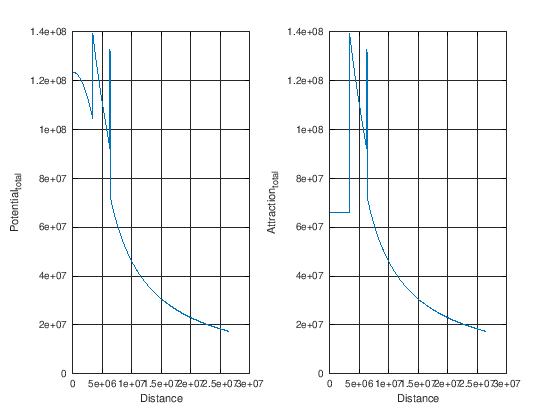

In [24]:
% Total
subplot(1,2,1);
plot(r,V_total)
xlabel('Distance')
ylabel('Potential_{total}')
grid
subplot(1,2,2);
plot(r,attraction_total)
xlabel('Distance')
ylabel('Attraction_{total}')
grid